In [1]:
# ----------------------------------------------------------------------------
# Author        :    Vasileios Perifanis
# Affiliation   :    Euclid team, Democritus University of Thrace, Dept. of Electrical & Computer Engineering
# Created Date  :    03/2022
# version       :    1.0
# ---------------------------------------------------------------------------

In [2]:
import networkx as nx
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import networkx.algorithms.community as nx_comm
from sklearn.metrics.cluster import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score,davies_bouldin_score, silhouette_score, rand_score, adjusted_rand_score, homogeneity_score, completeness_score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

from sklearn.cluster import KMeans

import copy

In [3]:
def print_metrics_community(method_name, G, communities):
    modularity_method = nx_comm.modularity(G, communities)
    coverage_method = nx_comm.coverage(G, communities)
    performance_method = nx_comm.performance(G, communities)
    print('---------')
    print(f'Metrics for communities with {method_name}')
    print(f'Modularity ({method_name}): {modularity_method:.4f}')
    print(f'Coverage ({method_name}: {coverage_method:.4f}')
    print(f'Performance ({method_name}: {performance_method:.4f}')
    return modularity_method

def print_metrics_cluster(method_name, ground_truth, labels):
    ground_truth = np.array(ground_truth)
    labels = np.array(labels)
    mi_score_method = mutual_info_score(ground_truth, labels)
    nmi_score_method = normalized_mutual_info_score(ground_truth, labels)
    ami_score_method = adjusted_mutual_info_score(ground_truth, labels)
    davies_bouldin_score_method = davies_bouldin_score(ground_truth.reshape(-1, 1), labels.ravel())
    silhouette_score_method = silhouette_score(ground_truth.reshape(-1, 1), labels.ravel())
    rand_score_method = rand_score(ground_truth, labels)
    adjusted_rand_score_method = adjusted_rand_score(ground_truth, labels)
    hom_score_method = homogeneity_score(ground_truth, labels)
    com_score_method = completeness_score(ground_truth, labels)
    print('---------')
    print(f'Metrics for clustering with {method_name}')
    print(f'Mutual Information (MI) score ({method_name}): {mi_score_method:.4f}')
    print(f'Normalized Mutual Information (NMI) score ({method_name}): {nmi_score_method:.4f}')
    print(f'Adjusted Mutual Information (AMI) score ({method_name}): {ami_score_method:.4f}')
    print(f'Davies Bouldin (DB) score ({method_name}): {davies_bouldin_score_method:.4f}')
    print(f'Silhouette score ({method_name}): {silhouette_score_method:.4f}')
    print(f'Rand score ({method_name}): {rand_score_method:.4f}')
    print(f'Adjusted Rand score ({method_name}): {adjusted_rand_score_method:.4f}')
    print(f'Homogeneity score ({method_name}): {hom_score_method:.4f}')
    print(f'Completeness score ({method_name}): {com_score_method:.4f}')
    return silhouette_score_method

    

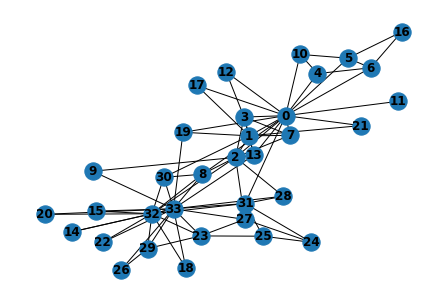

In [4]:
G = nx.karate_club_graph()

nx.draw(G, with_labels=True, font_weight='bold')

In [5]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [6]:
n = nx.number_of_nodes(G)
n

34

In [7]:
Mr_Hi = 0
John_A = 33

club_labels = nx.get_node_attributes(G,'club')

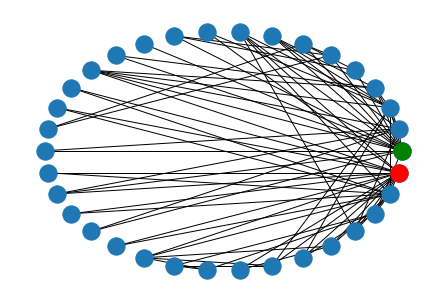

In [8]:
circ_pos = nx.circular_layout(G)
nx.draw(G,circ_pos)
# highlight Mr Hi (green) and John A (red)
nx.draw_networkx_nodes(G, circ_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(G, circ_pos, nodelist=[John_A], node_color='r', alpha=1)

In [9]:
# density
print("Network density:", nx.density(G))
# average degree
degree = G.degree()
degree_list = []
for (_,d) in degree:
    degree_list.append(d)
av_degree = sum(degree_list) / len(degree_list)
print('The average degree is ' + str(av_degree))

Network density: 0.13903743315508021
The average degree is 4.588235294117647


In [10]:
from operator import itemgetter

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Nodes by degree:")
for d in sorted_degree:
    print(d)

Nodes by degree:
(33, 17)
(0, 16)
(32, 12)
(2, 10)
(1, 9)
(3, 6)
(31, 6)
(8, 5)
(13, 5)
(23, 5)
(5, 4)
(6, 4)
(7, 4)
(27, 4)
(29, 4)
(30, 4)
(4, 3)
(10, 3)
(19, 3)
(24, 3)
(25, 3)
(28, 3)
(9, 2)
(12, 2)
(14, 2)
(15, 2)
(16, 2)
(17, 2)
(18, 2)
(20, 2)
(21, 2)
(22, 2)
(26, 2)
(11, 1)


In [11]:
club_labels = nx.get_node_attributes(G,'club')

In [12]:
node_label = {key:club_labels[key] for key in club_labels}
node_label

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer'}

In [13]:
labels = list(node_label.values())
le = preprocessing.LabelEncoder()
labels = list(le.fit_transform(labels))
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [14]:
def plot_community(G, partition):
    pos = nx.spring_layout(G)
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=300, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_color='w')
    plt.show()
    plt.close()

In [15]:
modularity, silhouette = dict(), dict()

# Community Detection

In [16]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

3
[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


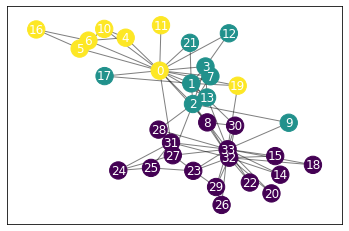

In [17]:
comp = greedy_modularity_communities(G)

print(len(comp))

community_0 = sorted(list(comp[0]))
community_1 = sorted(list(comp[1]))
community_2 = sorted(list(comp[2]))

print(community_0)
print(community_1)
print(community_2)

partition = dict()
for i, community in enumerate(list(comp)):
    for node in community:
        partition[node] = i

plot_community(G, partition)

In [18]:
clusters_gmc = [list(c) for c in comp]
labels_gmc = [None] * n
for i, c in enumerate(clusters_gmc):
    for node in c:
        labels_gmc[node] = i

In [19]:
m = print_metrics_community('Greedy modularity', G, clusters_gmc)
s = print_metrics_cluster('Greedy modularity', labels, labels_gmc)
modularity['greedy'] = m
silhouette['greedy'] = s

---------
Metrics for communities with Greedy modularity
Modularity (Greedy modularity): 0.4110
Coverage (Greedy modularity: 0.7564
Performance (Greedy modularity: 0.7148
---------
Metrics for clustering with Greedy modularity
Mutual Information (MI) score (Greedy modularity): 0.4890
Normalized Mutual Information (NMI) score (Greedy modularity): 0.5646
Adjusted Mutual Information (AMI) score (Greedy modularity): 0.5481
Davies Bouldin (DB) score (Greedy modularity): 1.3090
Silhouette score (Greedy modularity): 0.3804
Rand score (Greedy modularity): 0.7861
Adjusted Rand score (Greedy modularity): 0.5684
Homogeneity score (Greedy modularity): 0.7054
Completeness score (Greedy modularity): 0.4707


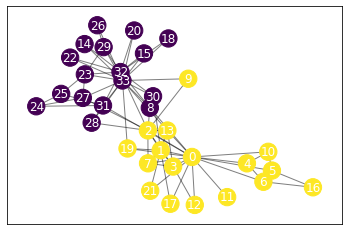

---------
Metrics for communities with Greedy modularity v2
Modularity (Greedy modularity v2): 0.3998
Coverage (Greedy modularity v2: 0.8718
Performance (Greedy modularity v2: 0.6185
---------
Metrics for clustering with Greedy modularity v2
Mutual Information (MI) score (Greedy modularity v2): 0.4694
Normalized Mutual Information (NMI) score (Greedy modularity v2): 0.6772
Adjusted Mutual Information (AMI) score (Greedy modularity v2): 0.6699
Davies Bouldin (DB) score (Greedy modularity v2): 0.2510
Silhouette score (Greedy modularity v2): 0.8233
Rand score (Greedy modularity v2): 0.8859
Adjusted Rand score (Greedy modularity v2): 0.7716
Homogeneity score (Greedy modularity v2): 0.6772
Completeness score (Greedy modularity v2): 0.6772


In [20]:
combined_community = [community_0, community_1 + community_2]
partition = dict()
for i, community in enumerate(combined_community):
    for node in community:
        partition[node] = i

plot_community(G, partition)

clusters_gmc = [list(c) for c in combined_community]
labels_gmc = [None] * n
for i, c in enumerate(clusters_gmc):
    for node in c:
        labels_gmc[node] = i
m = print_metrics_community('Greedy modularity v2', G, clusters_gmc)
s = print_metrics_cluster('Greedy modularity v2', labels, labels_gmc)
modularity['greedyv2'] = m
silhouette['greedyv2'] = s

In [21]:
import community as community_louvain

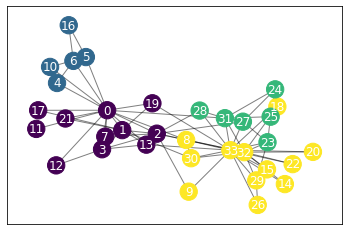

In [22]:
partition = community_louvain.best_partition(G, resolution=1., random_state=0)
num_of_clusters = max(partition.values()) + 1
plot_community(G, partition)

In [23]:
clusters_louv = [[]  for _ in range(num_of_clusters)]
for v in partition:
    c = partition[v]
    clusters_louv[c].append(v)

louvain_labels = [c for c in partition.values()]  

In [24]:
m = print_metrics_community('Louvain', G, clusters_louv)
s = print_metrics_cluster('Louvain', labels, louvain_labels)
modularity['Louvain'] = m
silhouette['Louvain'] = s

---------
Metrics for communities with Louvain
Modularity (Louvain): 0.4449
Coverage (Louvain: 0.7308
Performance (Louvain: 0.8039
---------
Metrics for clustering with Louvain
Mutual Information (MI) score (Louvain): 0.5919
Normalized Mutual Information (NMI) score (Louvain): 0.5878
Adjusted Mutual Information (AMI) score (Louvain): 0.5667
Davies Bouldin (DB) score (Louvain): 1.0000
Silhouette score (Louvain): -0.1765
Rand score (Louvain): 0.7362
Adjusted Rand score (Louvain): 0.4646
Homogeneity score (Louvain): 0.8539
Completeness score (Louvain): 0.4482


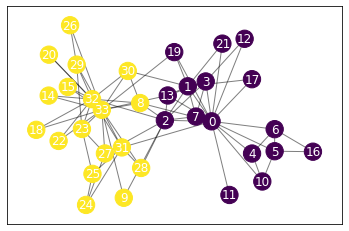

---------
Metrics for communities with Louvain
Modularity (Louvain): 0.4036
Coverage (Louvain: 0.8718
Performance (Louvain: 0.6168
---------
Metrics for clustering with Louvain
Mutual Information (MI) score (Louvain): 0.1856
Normalized Mutual Information (NMI) score (Louvain): 0.2681
Adjusted Mutual Information (AMI) score (Louvain): 0.2515
Davies Bouldin (DB) score (Louvain): 1.1018
Silhouette score (Louvain): 0.4201
Rand score (Louvain): 0.6631
Adjusted Rand score (Louvain): 0.3257
Homogeneity score (Louvain): 0.2678
Completeness score (Louvain): 0.2685


In [25]:
combined1, combined2 = clusters_louv[0] + clusters_louv[1], clusters_louv[2] + clusters_louv[3] 
combined_community = [combined1, combined2]

partition = dict()
for i, community in enumerate(combined_community):
    for node in community:
        partition[node] = i
        
plot_community(G, partition)
num_clusters = 2

clusters_louv = [[]  for _ in range(num_of_clusters)]
for v in partition:
    c = partition[v]
    clusters_louv[c].append(v)

louvain_labels = [c for c in partition.values()] 

m = print_metrics_community('Louvain', G, clusters_louv)
s = print_metrics_cluster('Louvain', labels, louvain_labels)
modularity['Louvainv2'] = m
silhouette['Louvainv2'] = s

In [26]:
g_self_loops = copy.deepcopy(G)
self_loops = [(i, i) for i in list(G.nodes())]
g_self_loops.add_edges_from(self_loops)

In [27]:
A = nx.convert_matrix.to_numpy_matrix(G, nodelist=None, weight=None)
A = np.asarray(A)

A_self_loops = nx.convert_matrix.to_numpy_matrix(g_self_loops, nodelist=None, weight=None)
A_self_loops = np.asarray(A_self_loops)

In [28]:
A

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [29]:
A_self_loops

array([[1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [30]:
num_clusters = 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(A)
y_pred = kmeans.predict(A)

In [31]:
clusters = [[] for _ in range(len(np.unique(y_pred)))]
for i, label in enumerate(y_pred):
    clusters[label].append(i)

In [32]:
m = print_metrics_community('KMeans', G, clusters)
s = print_metrics_cluster('KMeans', labels, y_pred)
modularity['Kmeans'] = m
silhouette['Kmeans'] = s

---------
Metrics for communities with KMeans
Modularity (KMeans): 0.4036
Coverage (KMeans: 0.8718
Performance (KMeans: 0.6168
---------
Metrics for clustering with KMeans
Mutual Information (MI) score (KMeans): 0.5796
Normalized Mutual Information (NMI) score (KMeans): 0.8372
Adjusted Mutual Information (AMI) score (KMeans): 0.8335
Davies Bouldin (DB) score (KMeans): 0.1111
Silhouette score (KMeans): 0.9118
Rand score (KMeans): 0.9412
Adjusted Rand score (KMeans): 0.8823
Homogeneity score (KMeans): 0.8361
Completeness score (KMeans): 0.8382


In [33]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(A_self_loops)
y_pred = kmeans.predict(A_self_loops)
clusters = [[] for _ in range(len(np.unique(y_pred)))]
for i, label in enumerate(y_pred):
    clusters[label].append(i)
m = print_metrics_community('KMeans_with_self', g_self_loops, clusters)
s = print_metrics_cluster('KMeans_with_self', labels, y_pred)
modularity['Kmeans_self'] = m
silhouette['Kmeans_self'] = s

---------
Metrics for communities with KMeans_with_self
Modularity (KMeans_with_self): 0.4158
Coverage (KMeans_with_self: 0.9107
Performance (KMeans_with_self: 0.6774
---------
Metrics for clustering with KMeans_with_self
Mutual Information (MI) score (KMeans_with_self): 0.5796
Normalized Mutual Information (NMI) score (KMeans_with_self): 0.8372
Adjusted Mutual Information (AMI) score (KMeans_with_self): 0.8335
Davies Bouldin (DB) score (KMeans_with_self): 0.1111
Silhouette score (KMeans_with_self): 0.9118
Rand score (KMeans_with_self): 0.9412
Adjusted Rand score (KMeans_with_self): 0.8823
Homogeneity score (KMeans_with_self): 0.8361
Completeness score (KMeans_with_self): 0.8382


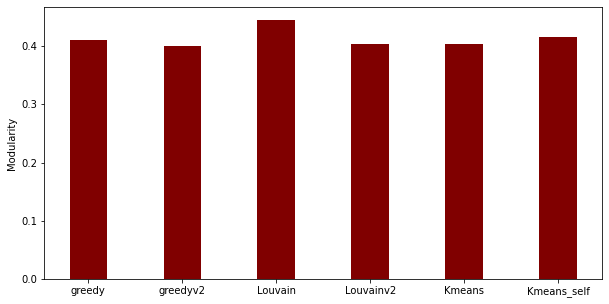

In [34]:
mod_method = list(modularity.keys())
mod_res = list(modularity.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(mod_method, mod_res, color ='maroon',
        width = 0.4)
 
plt.xlabel("")
plt.ylabel("Modularity")
plt.show()

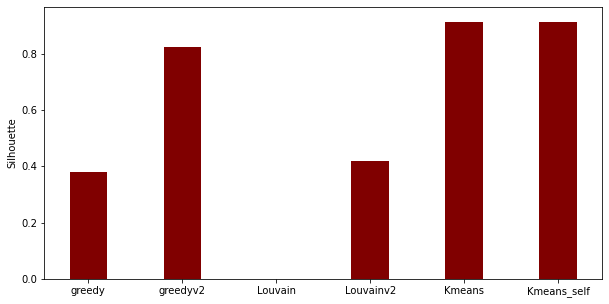

In [35]:
silhouette_method = list(silhouette.keys())
silhouette_res = list(silhouette.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(silhouette_method, silhouette_res, color ='maroon',
        width = 0.4)

plt.ylim(bottom=0.)
plt.xlabel("")
plt.ylabel("Silhouette")
plt.show()

---------
Metrics for clustering with k=34
Mutual Information (MI) score (k=34): 0.5796
Normalized Mutual Information (NMI) score (k=34): 0.8372
Adjusted Mutual Information (AMI) score (k=34): 0.8335
Davies Bouldin (DB) score (k=34): 0.1111
Silhouette score (k=34): 0.9118
Rand score (k=34): 0.9412
Adjusted Rand score (k=34): 0.8823
Homogeneity score (k=34): 0.8361
Completeness score (k=34): 0.8382
---------
Metrics for clustering with k=34
Mutual Information (MI) score (k=34): 0.5796
Normalized Mutual Information (NMI) score (k=34): 0.6835
Adjusted Mutual Information (AMI) score (k=34): 0.6710
Davies Bouldin (DB) score (k=34): 0.1111
Silhouette score (k=34): 0.4412
Rand score (k=34): 0.8342
Adjusted Rand score (k=34): 0.6660
Homogeneity score (k=34): 0.8361
Completeness score (k=34): 0.5780
---------
Metrics for clustering with k=34
Mutual Information (MI) score (k=34): 0.4282
Normalized Mutual Information (NMI) score (k=34): 0.4510
Adjusted Mutual Information (AMI) score (k=34): 0.418

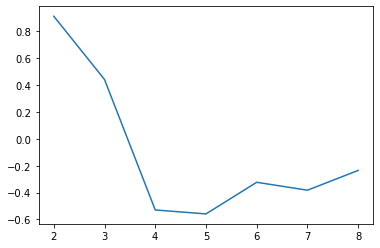

In [36]:
n_clusters = [i for i in range(2, 9)]
silhouette_scores = []
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(A_self_loops)
    y_pred = kmeans.predict(A_self_loops)
    clusters = [[] for _ in range(len(np.unique(y_pred)))]
    for i, label in enumerate(y_pred):
        clusters[label].append(i)
    s = print_metrics_cluster('k='+str(n), labels, y_pred)
    silhouette_scores.append(s)

plt.plot(silhouette_scores)
plt.xticks(np.arange(len(silhouette_scores)), np.arange(2, len(silhouette_scores)+2))
plt.show()